### **IN THIS A XAI WILL BE TRAINED**

In [1]:
#!pip install nltk

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier as xgb 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt') 
#nltk.download('wordnet')

In [29]:
df=pd.read_csv("C:\\Users\\Acer\\OneDrive\\Documents\\projects\\news_credibility_analyzer\\data\\cleaned.csv")

In [30]:
df.head()

,title,text,subject,date,label,year,month,day,dayofweek,text_length,title_length,punctuation_count,upper_case_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,2017.0,12.0,31.0,Sunday,2893,79,9,138
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0,2017.0,12.0,31.0,Sunday,1898,69,0,88
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,2017.0,12.0,30.0,Saturday,3597,90,4,308
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,2017.0,12.0,29.0,Friday,2774,78,1,123
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0,2017.0,12.0,25.0,Monday,2346,70,0,63


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
def get_top_word(data,n=10):
    '''count vectorizer to get the top n words in the text
    it returns a list of tuples with the word and its frequency'''
    vec=CountVectorizer(stop_words='english').fit(data)
    bag_of_words=vec.transform(data)#create the word count matrix
    sum_words=bag_of_words.sum(axis=0)#sum the counts of each word
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq=sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]


In [33]:
#nltk.download('punkt')
#nltk.download('punkt_tab')

In [34]:
get_top_word(df['text'],n=30)

[('said', np.int64(122617)),
 ('trump', np.int64(122145)),
 ('president', np.int64(48645)),
 ('people', np.int64(36263)),
 ('state', np.int64(30271)),
 ('reuters', np.int64(28953)),
 ('new', np.int64(27131)),
 ('donald', np.int64(25655)),
 ('house', np.int64(24889)),
 ('government', np.int64(24820)),
 ('republican', np.int64(24110)),
 ('states', np.int64(23996)),
 ('clinton', np.int64(22994)),
 ('obama', np.int64(22708)),
 ('year', np.int64(21981)),
 ('united', np.int64(21263)),
 ('just', np.int64(21152)),
 ('told', np.int64(20659)),
 ('white', np.int64(19758)),
 ('campaign', np.int64(19370)),
 ('like', np.int64(18992)),
 ('election', np.int64(18969)),
 ('party', np.int64(18660)),
 ('time', np.int64(18052)),
 ('washington', np.int64(16678)),
 ('news', np.int64(16160)),
 ('country', np.int64(15876)),
 ('did', np.int64(14667)),
 ('years', np.int64(14316)),
 ('security', np.int64(13874))]

In [35]:
def plot_top_words(data, n=10, filename=None):
    top_words=get_top_word(data,n)
    words, counts=zip(*top_words)
    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} words')
    plt.xlabel('Counts')
    plt.ylabel('Words')
    if filename:
        import os    
        plt.show()
        os.makedirs('../images', exist_ok=True)        
        plt.savefig(f'../images/{filename}.png', bbox_inches='tight', dpi=300)

In [36]:
from nltk import word_tokenize, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string

In [37]:
import contractions

def preprocess_text(text):
    """Clean and preprocess text data"""
    # Handle missing values first
    if pd.isna(text):
        return ''
    
    # Convert to string (in case of other data types)
    text = str(text).strip()
    
    # Check if empty after conversion
    if text == '' or text == 'nan':
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Expand contractions (wasn't → was not, don't → do not)
    try:
        text = contractions.fix(text)
    except:
        pass  # Skip if contractions fails
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Lemmatization (before removing stopwords)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    stop_words=stopwords.words('english')
    stopwords_set = set(stop_words)
    # Then remove stopwords (after lemmatization to catch more)
    tokens = [word for word in tokens if word not in stopwords_set]
    
    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

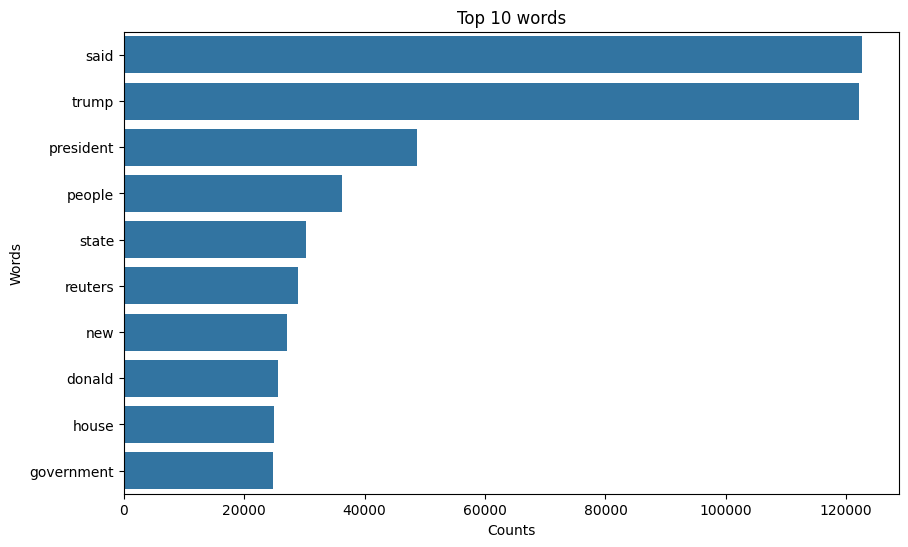

<Figure size 640x480 with 0 Axes>

In [38]:
plot_top_words(df['text'], filename='top_words_original')

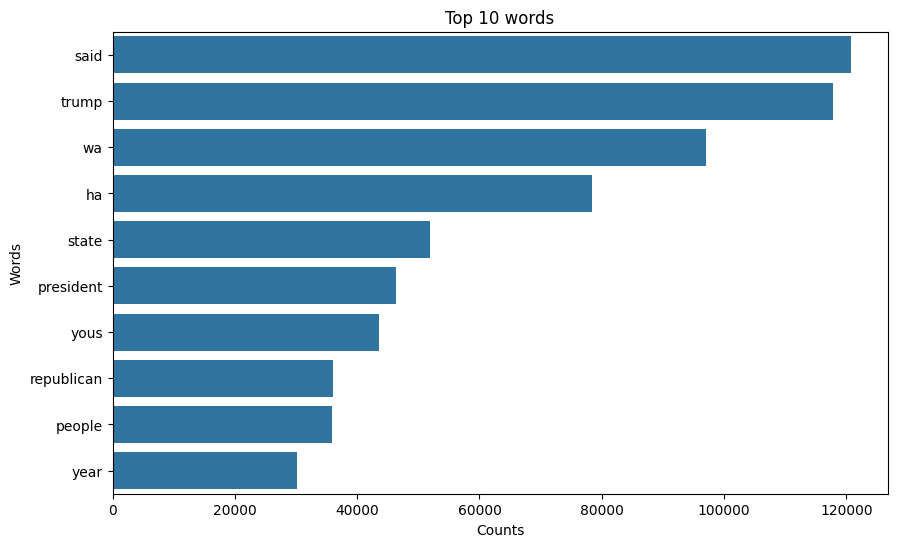

<Figure size 640x480 with 0 Axes>

In [39]:
plot_top_words(df['cleaned_text'], n=10, filename='top_words_cleaned')

In [40]:
#vectorization
from nltk.tokenize import RegexpTokenizer
tokens=RegexpTokenizer(r'[a-zA-Z0-9]+')
'''
tfid=TfidfVectorizer(tokenizer=tokens.tokenize, stop_words=None,ngram_range=(1,2),token_pattern=None)
X=tfid.fit_transform(df['cleaned_text'])
y=df['label']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
'''

'\ntfid=TfidfVectorizer(tokenizer=tokens.tokenize, stop_words=None,ngram_range=(1,2),token_pattern=None)\nX=tfid.fit_transform(df[\'cleaned_text\'])\ny=df[\'label\']   \nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\nnb = MultinomialNB()\nnb.fit(X_train, y_train)\ny_pred = nb.predict(X_test)\n\nprint("Accuracy:", accuracy_score(y_test, y_pred))\nprint(classification_report(y_test, y_pred))\n'

In [15]:
#!pip install textstat

In [41]:
import textstat

# Helper to clean and lowercase
def safe_text(text):
    return text if isinstance(text, str) else ""

# Text Length
df['text_length'] = df['text'].apply(lambda x: len(safe_text(x)))

# Uppercase Words Count
df['uppercase_words_count'] = df['text'].apply(
    lambda x: sum(word.isupper() for word in safe_text(x).split())
)

# Has Uppercase Emphasis (binary)
df['has_uppercase_emphasis'] = (df['uppercase_words_count'] > 0).astype(int)

# Long Text Flag
df['long_text_flag'] = (df['text_length'] > 3000).astype(int)

# Readability Score
df['readability_score'] = df['text'].apply(
    lambda x: textstat.flesch_reading_ease(x) if isinstance(x, str) and len(x.strip()) > 0 else 0
)

# Text Length Bin (Quantile)
df['text_length_bin'] = pd.qcut(df['text_length'], q=4, labels=[0, 1, 2, 3])

# Punctuation Alert (! or ?)
df['punctuation_alert'] = df['text'].apply(
    lambda x: int(bool(re.search(r'[!?]', safe_text(x))))
)

# First Sentence Length (number of words)
df['first_sentence_length'] = df['text'].apply(
    lambda x: len(re.split(r'[.!?]', safe_text(x).strip())[0].split())
)

# Drop intermediate/raw columns
df.drop(columns=['text_length'], inplace=True)

print("Feature engineering complete!")
df[['uppercase_words_count', 'has_uppercase_emphasis', 'long_text_flag', 
    'readability_score', 'text_length_bin', 'punctuation_alert', 
    'first_sentence_length']].head()

Feature engineering complete!


,uppercase_words_count,has_uppercase_emphasis,long_text_flag,readability_score,text_length_bin,punctuation_alert,first_sentence_length
0,5,1,0,62.715000,2,1,17
1,3,1,0,46.787209,1,0,13
2,42,1,1,61.930106,3,1,31
3,5,1,0,55.028359,2,1,27
4,0,0,0,62.447143,2,0,17


In [42]:
df.isnull().sum()

title                     0
text                      0
subject                   0
date                      6
label                     0
year                      6
month                     6
day                       6
dayofweek                 6
title_length              0
punctuation_count         0
upper_case_count          0
cleaned_text              0
uppercase_words_count     0
has_uppercase_emphasis    0
long_text_flag            0
readability_score         0
text_length_bin           0
punctuation_alert         0
first_sentence_length     0
dtype: int64

In [43]:
df.drop(columns=['text'], inplace=True )
df.rename(columns={'cleaned_text':'text'}, inplace=True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42,stratify=df['label'])

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Convert text_length_bin to numeric
df['text_length_bin'] = df['text_length_bin'].astype(int)

# Define numeric feature columns
numeric_features = ['uppercase_words_count', 'has_uppercase_emphasis', 'long_text_flag', 
                    'readability_score', 'text_length_bin', 'punctuation_alert', 
                    'first_sentence_length']

trf1=ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(tokenizer=tokens.tokenize, stop_words=None, ngram_range=(1,2), token_pattern=None), 'text'),
        #tfid equivalent to count vectorizer and the tfid transformer
        ('numeric', StandardScaler(), numeric_features)
    ],
    remainder='drop',
)
model=Pipeline(steps=
    [
        ('transformer', trf1),
        ('classifier', xgb(objective='binary:logistic', eval_metric='logloss'))
    ]
)

In [21]:
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('tfidf',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2),
                                                                  token_pattern=None,
                                                                  tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>),
                                                  'text'),
                                                 ('numeric', StandardScaler(),
                                                  ['uppercase_words_count',
                                                   'has...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [22]:
model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('tfidf',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2),
                                                                  token_pattern=None,
                                                                  tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>),
                                                  'text'),
                                                 ('numeric', StandardScaler(),
                                                  ['uppercase_words_count',
                                                   'has...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [23]:
y_pred=model.predict(X_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9959896507115136
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3491
           1       0.99      1.00      1.00      4239

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



In [46]:
trf2=ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(tokenizer=tokens.tokenize, stop_words=None, ngram_range=(1,2), token_pattern=None), 'text')
        #tfid equivalent to count vectorizer and the tfid transforme
    ],
    remainder='drop',
)
model2=Pipeline(steps=
    [
        ('transformer', trf2),
        ('classifier', xgb(objective='binary:logistic', eval_metric='logloss'))
    ]
)

In [26]:
model2.fit(X_train[['text']], y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('tfidf',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2),
                                                                  token_pattern=None,
                                                                  tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>),
                                                  'text')])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=No...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [27]:
y_pred=model2.predict(X_test[['text']])
print("Accuracy:", accuracy_score(y_test, y_pred))  
print(classification_report(y_test, y_pred))



Accuracy: 0.9959896507115136
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3491
           1       0.99      1.00      1.00      4239

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



In [47]:
# Comprehensive ML Models with RandomizedSearchCV for News Credibility
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Prepare text-only data
X_text_train = X_train[['text']]
X_text_test = X_test[['text']]

# Define results storage
results = []

print("Starting model training with RandomizedSearchCV...\n")
print("="*80)

Starting model training with RandomizedSearchCV...



In [ ]:
# 1. Logistic Regression
print("\n1. Logistic Regression with RandomizedSearchCV")
lr_params = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 500]
}

lr_pipeline = Pipeline([
    ('transformer', ColumnTransformer([
        ('tfidf', TfidfVectorizer(tokenizer=tokens.tokenize, stop_words=None, ngram_range=(1,2), max_features=10000, token_pattern=None), 'text')
    ], remainder='drop')),
    ('classifier', LogisticRegression(random_state=42))
])

lr_random = RandomizedSearchCV(lr_pipeline, lr_params, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=1)
start_time = time.time()
lr_random.fit(X_text_train, y_train)
train_time = time.time() - start_time

y_pred_lr = lr_random.predict(X_text_test)
results.append({
    'Model': 'Logistic Regression',
    'Best Params': lr_random.best_params_,
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'Training Time': train_time
})
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Best Params: {lr_random.best_params_}")
print("="*80)


1. Logistic Regression with RandomizedSearchCV
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy: 0.9889
Best Params: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__max_iter': 100, 'classifier__C': 100}


In [30]:
# 2. Random Forest
print("\n2. Random Forest with RandomizedSearchCV")
rf_params = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

gb_pipeline = Pipeline([
    ('transformer', ColumnTransformer([
        ('tfidf', TfidfVectorizer(tokenizer=tokens.tokenize, stop_words=None, ngram_range=(1,2), max_features=10000, token_pattern=None), 'text')
    ], remainder='drop')),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

rf_random = RandomizedSearchCV(rf_pipeline, rf_params, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=1)
start_time = time.time()
rf_random.fit(X_text_train, y_train)
train_time = time.time() - start_time

y_pred_rf = rf_random.predict(X_text_test)
results.append({
    'Model': 'Random Forest',
    'Best Params': rf_random.best_params_,
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Training Time': train_time
})
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Best Params: {rf_random.best_params_}")
print("="*80)


2. Random Forest with RandomizedSearchCV
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy: 0.9316
Best Params: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 30}


In [14]:
# 3. XGBoost
'''
print("\n3. XGBoost with RandomizedSearchCV")
xgb_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.7, 0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

xgb_pipeline = Pipeline([
    ('transformer', ColumnTransformer([
        ('tfidf', TfidfVectorizer(tokenizer=tokens.tokenize, stop_words=None, ngram_range=(1,2), max_features=10000, token_pattern=None), 'text')
    ], remainder='drop')),
    ('classifier', XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42))
])

xgb_random = RandomizedSearchCV(xgb_pipeline, xgb_params, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=1)
start_time = time.time()
xgb_random.fit(X_text_train, y_train)

y_pred_xgb = xgb_random.predict(X_text_test)
results.append({
    'Model': 'XGBoost',
    'Best Params': xgb_random.best_params_,
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'Training Time': train_time
})
'''
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Best Params: {xgb_random.best_params_}")
print("="*80)

Accuracy: 0.9959
Best Params: {'classifier__subsample': 0.9, 'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.9}


In [ ]:
# 6. Support Vector Machine (SVM)
print("\n6. SVM with RandomizedSearchCV")
svm_params = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01]
}

svm_pipeline = Pipeline([
    ('transformer', ColumnTransformer([
        ('tfidf', TfidfVectorizer(tokenizer=tokens.tokenize, stop_words=None, ngram_range=(1,2), max_features=5000, token_pattern=None), 'text')
    ], remainder='drop')),
    ('classifier', SVC(random_state=42))
])

svm_random = RandomizedSearchCV(svm_pipeline, svm_params, n_iter=8, cv=3, random_state=42, n_jobs=-1, verbose=1)
start_time = time.time()
svm_random.fit(X_text_train, y_train)
train_time = time.time() - start_time

y_pred_svm = svm_random.predict(X_text_test)
results.append({
    'Model': 'SVM',
    'Best Params': svm_random.best_params_,
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'Training Time': train_time
})
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Best Params: {svm_random.best_params_}")
print("="*80)


6. SVM with RandomizedSearchCV
Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [48]:
# Final XGBoost model pipeline with full NLP preprocessing

import re

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords



# Define tokenizer + lemmatizer + stopword removal for TF-IDF

stop_words_final = set(stopwords.words('english'))

lemmatizer_final = WordNetLemmatizer()



def tokenize_lemmatize(text):

    if pd.isna(text):

        return []

    # To string and lower

    text = str(text).lower()

    # Remove URLs

    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Remove HTML tags

    text = re.sub(r"<.*?>", " ", text)

    # Keep only letters and spaces

    text = re.sub(r"[^a-zA-Z\s]", " ", text)

    # Tokenize

    tokens = word_tokenize(text)

    # Lemmatize and remove stopwords

    tokens = [lemmatizer_final.lemmatize(t) for t in tokens

              if t not in stop_words_final and len(t) > 1]

    return tokens



# Final TF-IDF + XGBoost pipeline using best params

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

from xgboost import XGBClassifier



best_params_xgb = {

    'subsample': 0.9,

    'n_estimators': 200,

    'max_depth': 3,

    'learning_rate': 0.1,

    'colsample_bytree': 0.9

}



final_xgb_pipeline = Pipeline([

    ('tfidf', TfidfVectorizer(

        tokenizer=tokenize_lemmatize,

        preprocessor=None,

        lowercase=False,

        ngram_range=(1, 2),

        max_features=10000

    )),

    ('classifier', XGBClassifier(

        objective='binary:logistic',

        eval_metric='logloss',

        random_state=42,

        **best_params_xgb

    ))

])



# Train and evaluate on the existing train/test split

X_train_text = X_train['text']

X_test_text = X_test['text']



final_xgb_pipeline.fit(X_train_text, y_train)

y_pred_final = final_xgb_pipeline.predict(X_test_text)



print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")

print(f"Best Params: {{'classifier__subsample': {best_params_xgb['subsample']}, "

      f"'classifier__n_estimators': {best_params_xgb['n_estimators']}, "

      f"'classifier__max_depth': {best_params_xgb['max_depth']}, "

      f"'classifier__learning_rate': {best_params_xgb['learning_rate']}, "

      f"'classifier__colsample_bytree': {best_params_xgb['colsample_bytree']}}}")


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.9959
Best Params: {'classifier__subsample': 0.9, 'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.9}


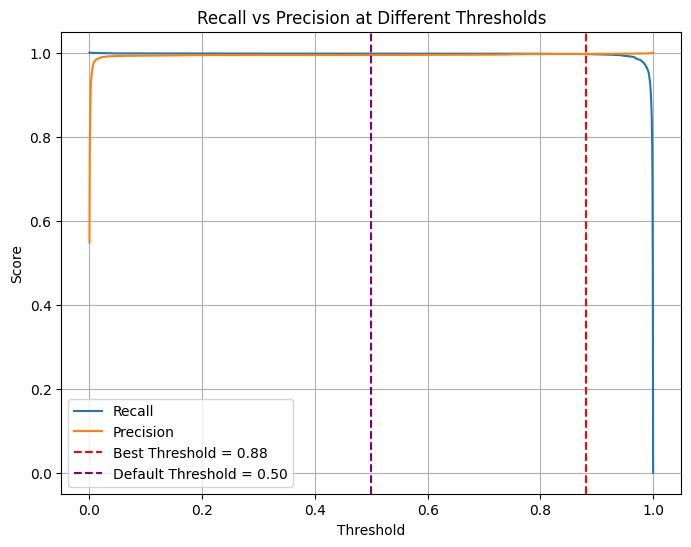

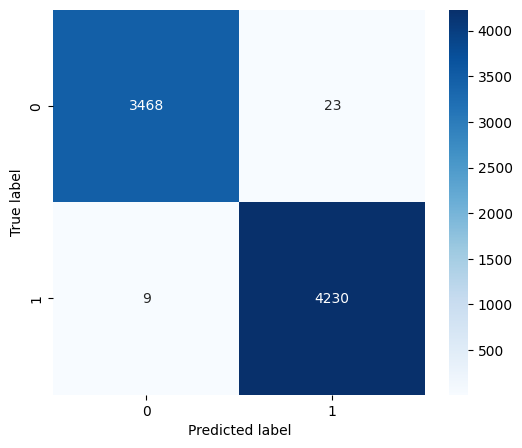

In [50]:
# Precision-Recall curves and Confusion Matrix for final XGBoost model

from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix
# Use the same test data and fitted pipeline from the previous cell

X_test_text = X_test['text']
# Predicted probabilities for the positive class
y_scores_final = final_xgb_pipeline.predict_proba(X_test_text)[:, 1]
# Precision-Recall curve (Precision vs Recall)
prec, rec, thresholds = precision_recall_curve(y_test, y_scores_final)
avg_prec = average_precision_score(y_test, y_scores_final)

# Precision and Recall as a function of decision threshold
# (curve style you requested)
diff = np.abs(prec[:-1] - rec[:-1])  # Exclude last element
min_index = np.argmin(diff)
best_threshold = thresholds[min_index]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, rec[:-1], label='Recall')
plt.plot(thresholds, prec[:-1], label='Precision')
plt.axvline(x=best_threshold, color='red', linestyle='--',
            label=f'Best Threshold = {best_threshold:.2f}')
plt.axvline(x=0.5, color='purple', linestyle='--',
            label='Default Threshold = 0.50')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Recall vs Precision at Different Thresholds')
plt.legend()
plt.grid(True)
plt.savefig('../images/precision_recall_threshold_curve.png', bbox_inches='tight', dpi=300)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('../images/confusion_matrix_final_model.png', bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
# Save final XGBoost pipeline as a .pkl file using joblib

import os
import joblib
model_dir = os.path.join('..', 'model')
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'final_xgb_pipeline.pkl')
# Save the trained pipeline (includes preprocessing + XGBoost model)
joblib.dump(final_xgb_pipeline, model_path)
print(f"Model saved to: {model_path}")

Model saved to: ..\model\final_xgb_pipeline.pkl
